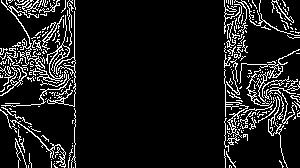

In [1]:
from diffusers.utils import load_image 
from PIL import Image
import cv2
import numpy as np
from diffusers.utils import load_image

# Q. 코드를 작성해 보세요.
# 이미지를 불러오세요. 
canny_image = load_image(
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGmJ3bXXoUVMIn-An2puaoOl3XvNDwezupBQ&s"
)
#canny_image = # [[YOUR CODE]]

#threshhold를 지정합니다. 
low_threshold = 100
high_threshold = 200

# 이미지를 NumPy 배열로 변환합니다. 
canny_image = np.array(canny_image)

# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다. 
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

# 윤곽선을 검출하고 NumPy 배열을 PIL 이미지로 변환합니다. 
canny_image = cv2.Canny(canny_image, low_threshold, high_threshold)
canny_image = Image.fromarray(canny_image)

canny_image

cuda


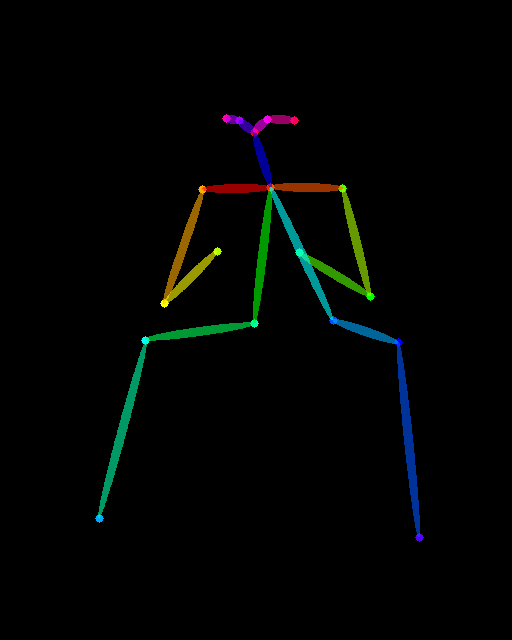

In [2]:
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image 

# Q. 아래의 코드를 작성해 주세요.
# 이미지를 불러옵니다. 
openpose_image = load_image(
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-sRBwSvnDbF3WO9ONClxT9rVIAEnZyc5V5g&s"
)

# OpenposeDetector를 사용하여 인체 자세를 검출합니다. 
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
openpose_image = openpose(openpose_image)

openpose_image

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler  
import torch

# Q. 코드를 작성해 보세요.

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)

# Edge Detection과 Openpose, 2개의 전처리기를 controlnets라는 리스트로 만듭니다. 
controlnets = [canny_controlnet, openpose_controlnet]

# 리스트 controlnets를 파이프라인으로 전달합니다. 
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnets,
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")


# 프롬프트를 작성합니다. 
prompt =  ["A sinister mastermind, wearing a high-collared trench coat, seated in a grand gothic chamber, illuminated by flickering candlelight, holding a glass of wine, deep shadows, menacing aura, highly detailed, ultra-realistic, dark and mysterious atmosphere", 
    "A serene monk, standing before a grand altar, surrounded by floating candles and sacred texts, chanting ancient prayers, warm golden light illuminating the holy shrine, ethereal atmosphere, hyper-detailed, divine aesthetic"]
negative_prompt = ["blurry"] * 2

# seed를 지정합니다. 
generator = torch.manual_seed(2)

# ✅ ControlNet에 전달할 입력 이미지 (512x512로 크기 조정)
image_size = (512, 512)  # ✅ Stable Diffusion 모델이 기대하는 크기
openpose_image = openpose_image.resize(image_size, Image.LANCZOS)  # 이미지 리사이징
canny_image = canny_image.resize(image_size, Image.LANCZOS)  # 이미지 리사이징

images = [canny_image, openpose_image]


# 이미지를 생성합니다. 
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=10, 
    generator=generator, 
    image=images
).images

# 생성된 이미지를 저장합니다.
image[0].save("aiffel/multi_controlnet_output_13.png")
image[1].save("aiffel/multi_controlnet_output_14.png")



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so
/opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 113
CUDA SETUP: Loading binary /opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so...


/opt/conda/lib/python3.9/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "
/opt/conda/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib')}
  warn(msg)
/opt/conda/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/local/nvidia/lib:/usr/local/nvidia/lib64 did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/opt/conda/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('tcp'), Posix

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]